In [1]:
# notebooks/1_exploratory_data_analysis.ipynb

# %% [markdown]
# # Exploratory Data Analysis of Tech Sales Data
# 
# This notebook demonstrates exploratory data analysis of our tech sales dataset.

# %%
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add project root to path
sys.path.insert(0, os.path.abspath('..'))

# Import custom modules
from src.data_processing.data_loader import DataLoader
from src.data_processing.document_processor import DocumentProcessor
from src.utils.logger import setup_logger

# Setup logging
logger = setup_logger("exploratory_analysis")

# %%
# Load the data
data_loader = DataLoader()
df = data_loader.load_raw_data("tech_sales_2023_2.csv")

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

2025-05-19 00:05:58,608 - data_loader - INFO - Loading raw data from c:\Users\vgmar\smart-document-assistant\data\raw\tech_sales_2023_2.csv
2025-05-19 00:05:59,343 - data_loader - INFO - Successfully loaded 100000 records
Dataset shape: (100000, 13)

Data types:
transaction_id       object
transaction_date     object
product_category     object
quantity              int64
customer_id          object
customer_type        object
payment_method       object
warranty_years        int64
store_location       object
product_brand        object
unit_price          float64
total_price         float64
customer_email       object
dtype: object

First 5 rows:


,transaction_id,transaction_date,product_category,quantity,customer_id,customer_type,payment_method,warranty_years,store_location,product_brand,unit_price,total_price,customer_email
0,TXN1000000,2023-04-13,Laptops,3,c95bf829,Business,Debit Card,1,South Jeffrey,Lenovo,934.96,2804.87,zhoward@example.net
1,TXN1000001,2023-12-15,Accessories,3,1c6ce8e5,Individual,Debit Card,2,Cunninghamfurt,Generic,137.19,411.58,jwilliams@example.net
2,TXN1000002,2023-09-28,Tablets,1,f282d6e1,Individual,Debit Card,3,Michaelport,Amazon,481.17,481.17,kevin12@example.org
3,TXN1000003,2023-04-17,Laptops,4,5dc5cc41,Individual,Credit Card,2,Port Nicole,HP,1153.45,4613.79,jennifer17@example.com
4,TXN1000004,2023-03-13,Laptops,2,71b2b098,Individual,Credit Card,1,West Kelseyfort,Asus,931.24,1862.47,michelle16@example.net


In [2]:
# %% [markdown]
# ## Data Cleaning and Preprocessing

# %%
# Initialize document processor
document_processor = DocumentProcessor()

# Clean the data
df_clean = document_processor.clean_data(df)

# Display info after cleaning
print(f"Shape after cleaning: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")


2025-05-19 00:12:40,421 - document_processor - INFO - Initializing document processor
2025-05-19 00:12:40,424 - document_processor - INFO - Starting data cleaning process
2025-05-19 00:12:40,434 - document_processor - INFO - Initial data shape: (100000, 13)
2025-05-19 00:12:40,492 - document_processor - INFO - Missing values: 4913
2025-05-19 00:12:40,493 - document_processor - INFO - Handling missing values
2025-05-19 00:12:40,495 - document_processor - INFO - Removing duplicates based on transaction_id
2025-05-19 00:12:40,529 - document_processor - INFO - Fixing data types
2025-05-19 00:12:40,563 - document_processor - INFO - Verifying total_price calculations
2025-05-19 00:12:40,565 - document_processor - WARNING - Found 20408 records with total price discrepancies
2025-05-19 00:12:40,565 - document_processor - INFO - Correcting total_price values
2025-05-19 00:12:40,565 - document_processor - INFO - Final data shape after cleaning: (100000, 13)
2025-05-19 00:12:40,612 - document_pro

In [3]:

# %% [markdown]
# ## Feature Transformation

# %%
# Transform features
df_transformed = document_processor.transform_features(df_clean)

# Check new columns
new_columns = set(df_transformed.columns) - set(df_clean.columns)
print(f"New columns created: {new_columns}")
df_transformed.head()

2025-05-19 00:16:22,855 - document_processor - INFO - Starting feature transformation
2025-05-19 00:16:22,891 - document_processor - INFO - Extracting date features
2025-05-19 00:16:23,029 - document_processor - INFO - Creating binary flags
2025-05-19 00:16:23,052 - document_processor - INFO - Creating price categories
2025-05-19 00:16:23,075 - document_processor - INFO - Creating purchase volume category
2025-05-19 00:16:23,083 - document_processor - INFO - Feature transformation complete. New shape: (100000, 22)
New columns created: {'purchase_year', 'has_email', 'purchase_dayofweek', 'purchase_month', 'purchase_day', 'is_business', 'price_category', 'purchase_quarter', 'purchase_volume'}


,transaction_id,transaction_date,product_category,quantity,customer_id,customer_type,payment_method,warranty_years,store_location,product_brand,...,customer_email,purchase_year,purchase_month,purchase_day,purchase_dayofweek,purchase_quarter,is_business,has_email,price_category,purchase_volume
0,TXN1000000,2023-04-13,Laptops,3,c95bf829,Business,Debit Card,1,South Jeffrey,Lenovo,...,zhoward@example.net,2023,4,13,3,2,1,1,Medium,Triple
1,TXN1000001,2023-12-15,Accessories,3,1c6ce8e5,Individual,Debit Card,2,Cunninghamfurt,Generic,...,jwilliams@example.net,2023,12,15,4,4,0,1,Low,Triple
2,TXN1000002,2023-09-28,Tablets,1,f282d6e1,Individual,Debit Card,3,Michaelport,Amazon,...,kevin12@example.org,2023,9,28,3,3,0,1,Low,Single
3,TXN1000003,2023-04-17,Laptops,4,5dc5cc41,Individual,Credit Card,2,Port Nicole,HP,...,jennifer17@example.com,2023,4,17,0,2,0,1,High,Bulk
4,TXN1000004,2023-03-13,Laptops,2,71b2b098,Individual,Credit Card,1,West Kelseyfort,Asus,...,michelle16@example.net,2023,3,13,0,1,0,1,Medium,Double


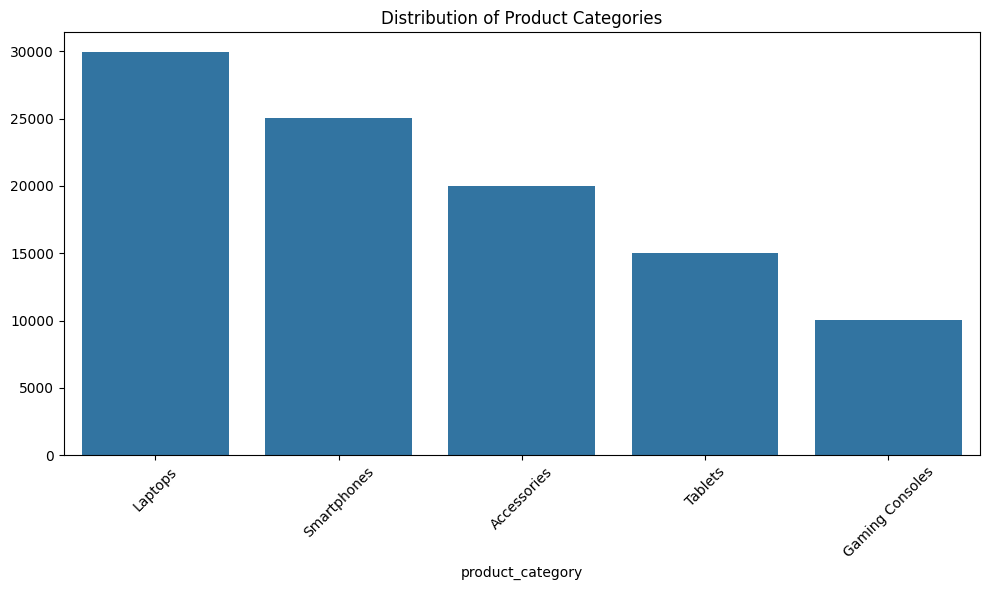

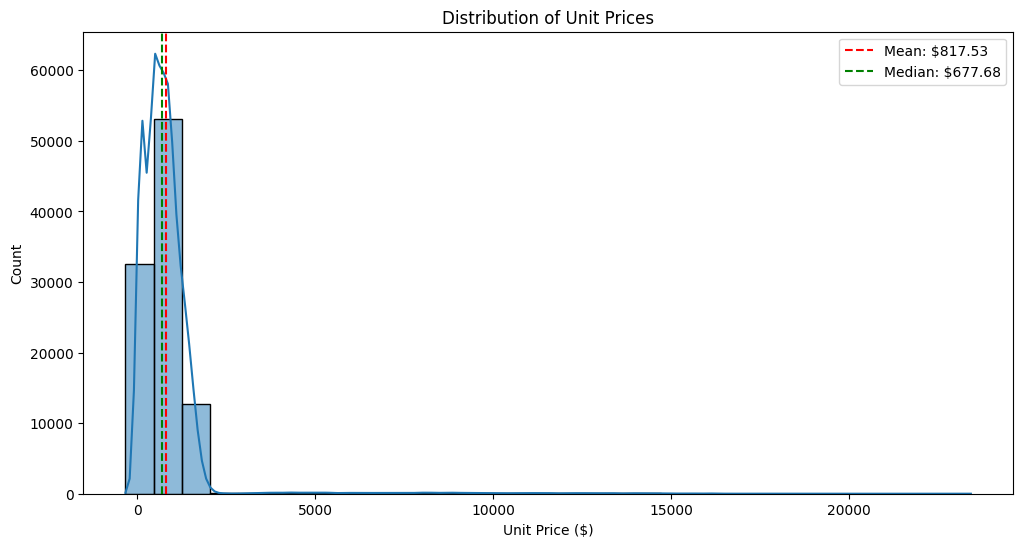

In [4]:
# %% [markdown]
# ## Basic Distribution Analysis

# %%
# Analyze product categories
plt.figure(figsize=(10, 6))
product_counts = df_transformed['product_category'].value_counts()
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %%
# Analyze price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_transformed['unit_price'], bins=30, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price ($)')
plt.axvline(df_transformed['unit_price'].mean(), color='red', linestyle='--', label=f'Mean: ${df_transformed["unit_price"].mean():.2f}')
plt.axvline(df_transformed['unit_price'].median(), color='green', linestyle='--', label=f'Median: ${df_transformed["unit_price"].median():.2f}')
plt.legend()
plt.show()

2025-05-19 00:19:16,844 - document_processor - INFO - Detecting outliers in columns: ['unit_price', 'total_price']
2025-05-19 00:19:16,857 - document_processor - INFO - Found 1743 outliers in column 'unit_price'
2025-05-19 00:19:16,867 - document_processor - INFO - Found 3259 outliers in column 'total_price'
2025-05-19 00:19:16,870 - document_processor - INFO - Total unique outliers across all columns: 3438


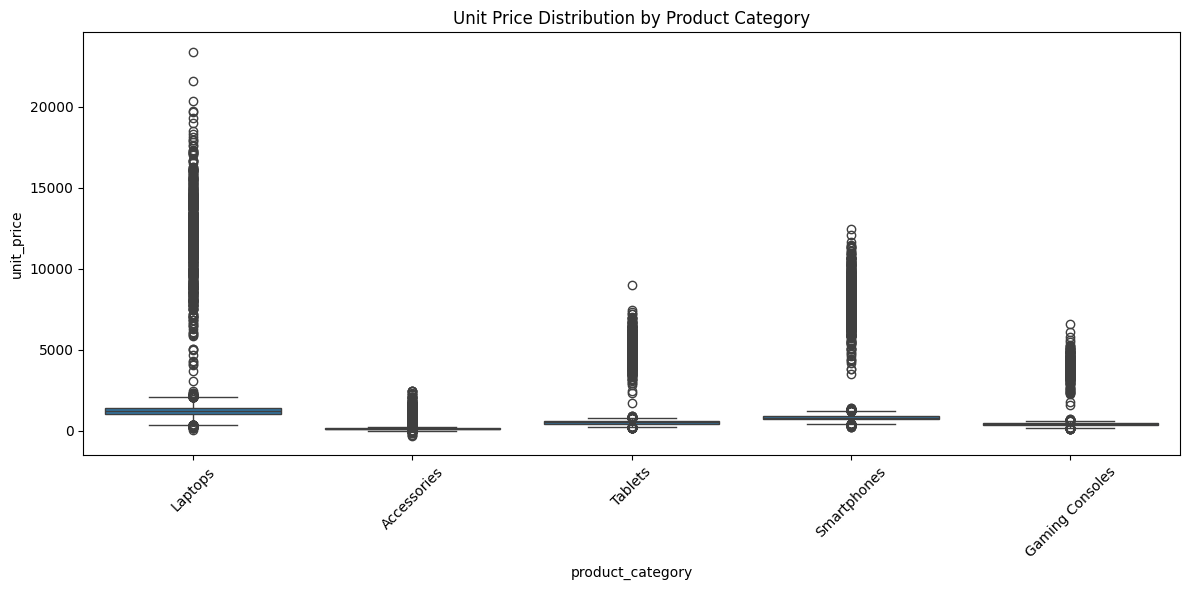

Number of outliers detected: 3438


,transaction_id,transaction_date,product_category,quantity,customer_id,customer_type,payment_method,warranty_years,store_location,product_brand,...,purchase_year,purchase_month,purchase_day,purchase_dayofweek,purchase_quarter,is_business,has_email,price_category,purchase_volume,is_outlier
41,TXN1000041,2023-05-11,Tablets,2,0f5bedc7,Individual,Credit Card,1,Carriemouth,Samsung,...,2023,5,11,3,2,0,0,Very High,Double,1
62,TXN1000062,2023-12-26,Laptops,1,69bcaff6,Individual,Credit Card,2,Port Deborah,Asus,...,2023,12,26,1,4,0,1,Very High,Single,1
89,TXN1000089,2023-07-07,Laptops,3,f1a90d80,Individual,Debit Card,2,Justintown,HP,...,2023,7,7,4,3,0,1,Very High,Triple,1
216,TXN1000216,2023-06-21,Laptops,4,83599d2b,Business,Cash,1,North Waynechester,Apple,...,2023,6,21,2,2,1,1,High,Bulk,1
226,TXN1000226,2023-10-21,Laptops,4,b6ab8773,Individual,Credit Card,2,New Robert,Asus,...,2023,10,21,5,4,0,1,High,Bulk,1


In [5]:
# %% [markdown]
# ## Outlier Analysis

# %%
# Detect outliers
df_with_outliers = document_processor.detect_outliers(df_transformed)

# Visualize outliers in unit price
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='unit_price', data=df_with_outliers)
plt.title('Unit Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %%
# Examine outliers
outliers = df_with_outliers[df_with_outliers['is_outlier'] == 1]
print(f"Number of outliers detected: {len(outliers)}")
outliers.head()

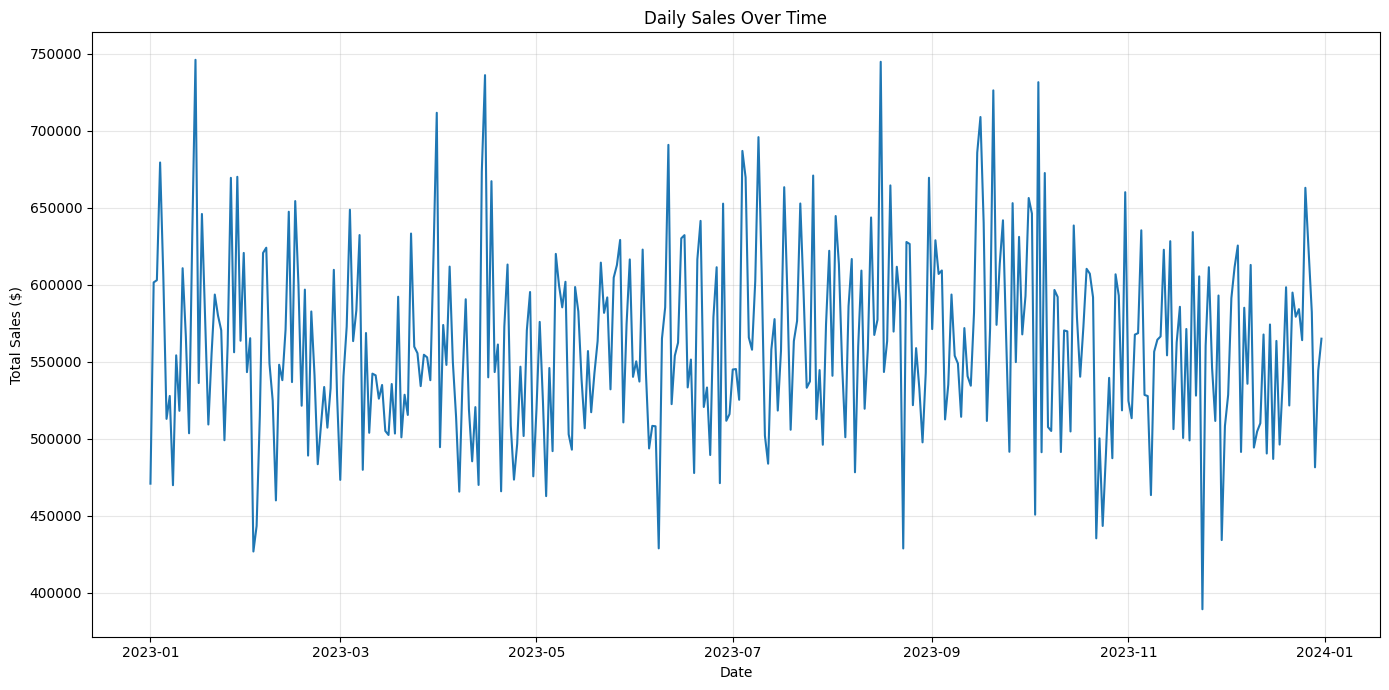

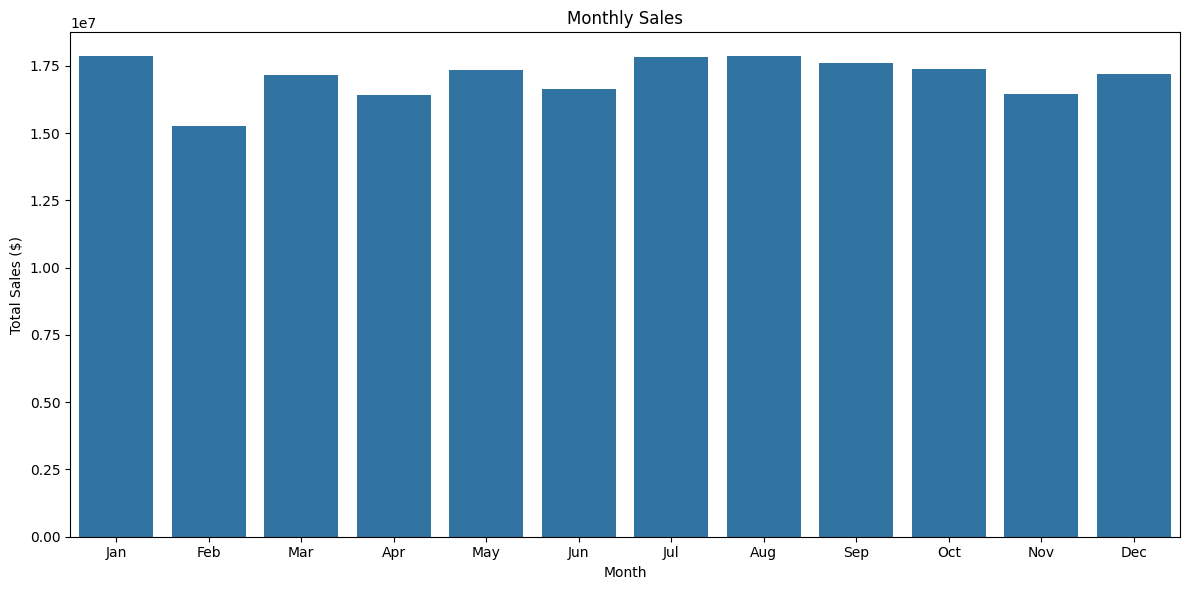

In [6]:
# %% [markdown]
# ## Time Series Analysis

# %%
# Analyze sales over time
sales_by_date = df_transformed.groupby('transaction_date')['total_price'].sum().reset_index()
sales_by_date['transaction_date'] = pd.to_datetime(sales_by_date['transaction_date'])

plt.figure(figsize=(14, 7))
plt.plot(sales_by_date['transaction_date'], sales_by_date['total_price'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Monthly sales
df_transformed['month'] = pd.to_datetime(df_transformed['transaction_date']).dt.month
monthly_sales = df_transformed.groupby('month')['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_price', data=monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

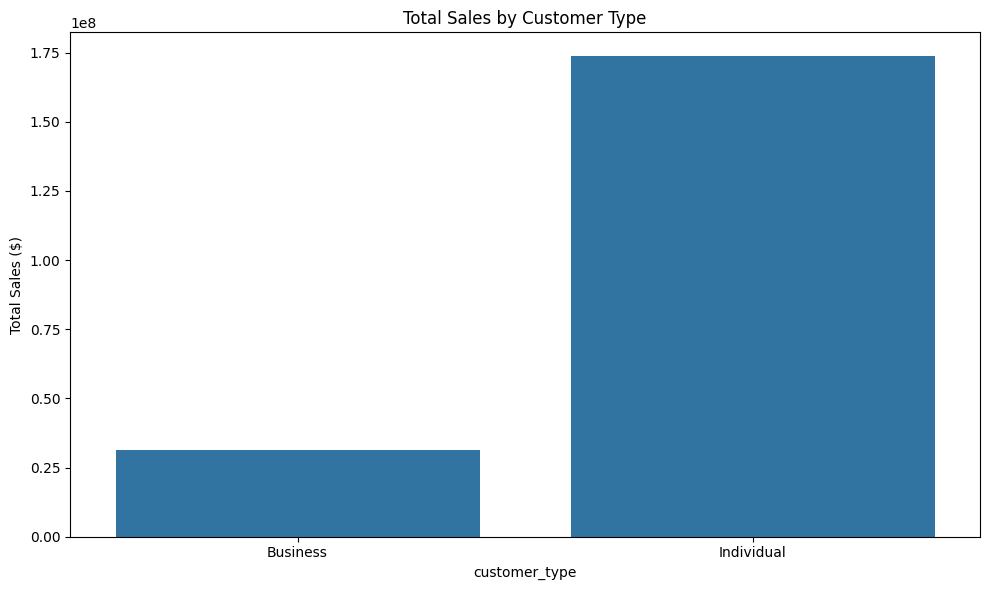

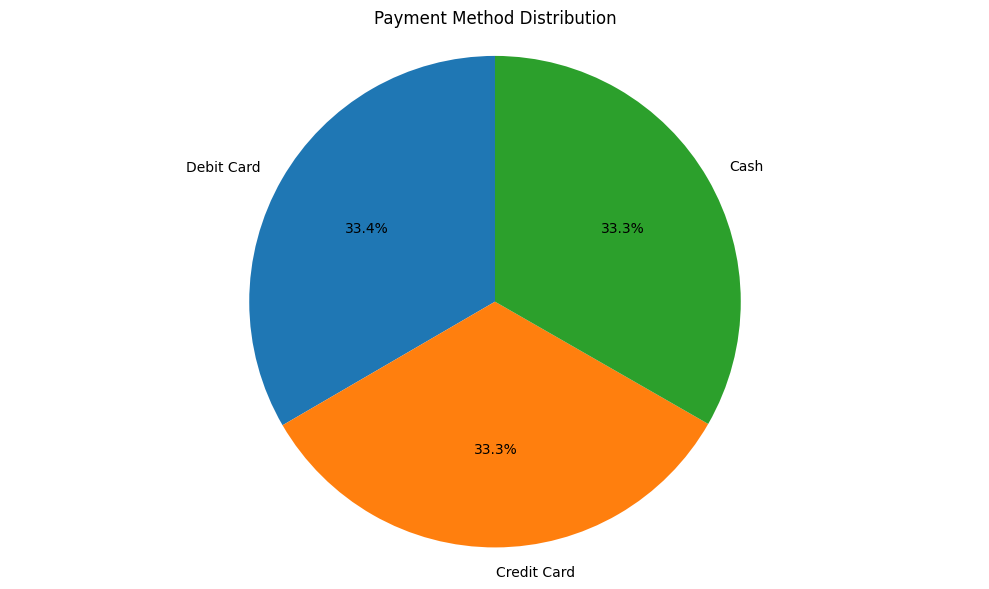

In [7]:
# %% [markdown]
# ## Customer Insights

# %%
# Customer type analysis
plt.figure(figsize=(10, 6))
customer_type_sales = df_transformed.groupby('customer_type')['total_price'].sum().reset_index()
sns.barplot(x='customer_type', y='total_price', data=customer_type_sales)
plt.title('Total Sales by Customer Type')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# %%
# Payment method analysis
plt.figure(figsize=(10, 6))
payment_counts = df_transformed['payment_method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

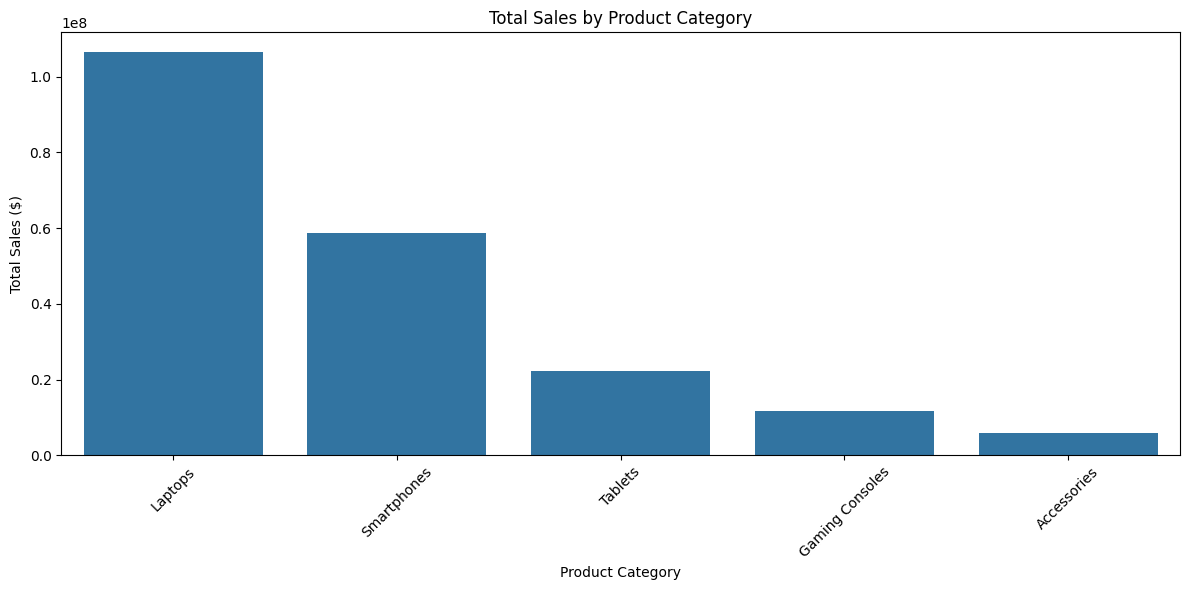

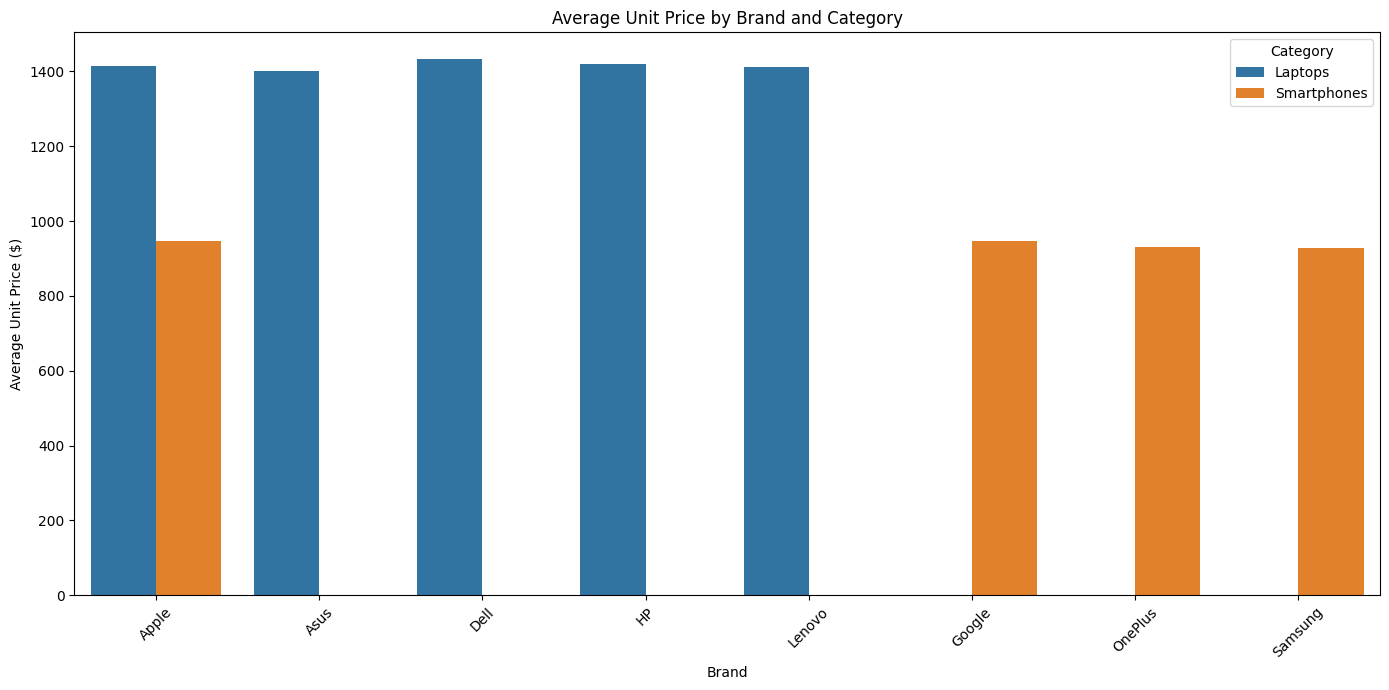

In [8]:
# %% [markdown]
# ## Product Analysis

# %%
# Sales by product category
category_sales = df_transformed.groupby('product_category')['total_price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='product_category', y='total_price', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %%
# Average price by product brand for top categories
top_categories = ['Laptops', 'Smartphones']
brand_price = df_transformed[df_transformed['product_category'].isin(top_categories)].groupby(['product_category', 'product_brand'])['unit_price'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='product_brand', y='unit_price', hue='product_category', data=brand_price)
plt.title('Average Unit Price by Brand and Category')
plt.xlabel('Brand')
plt.ylabel('Average Unit Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

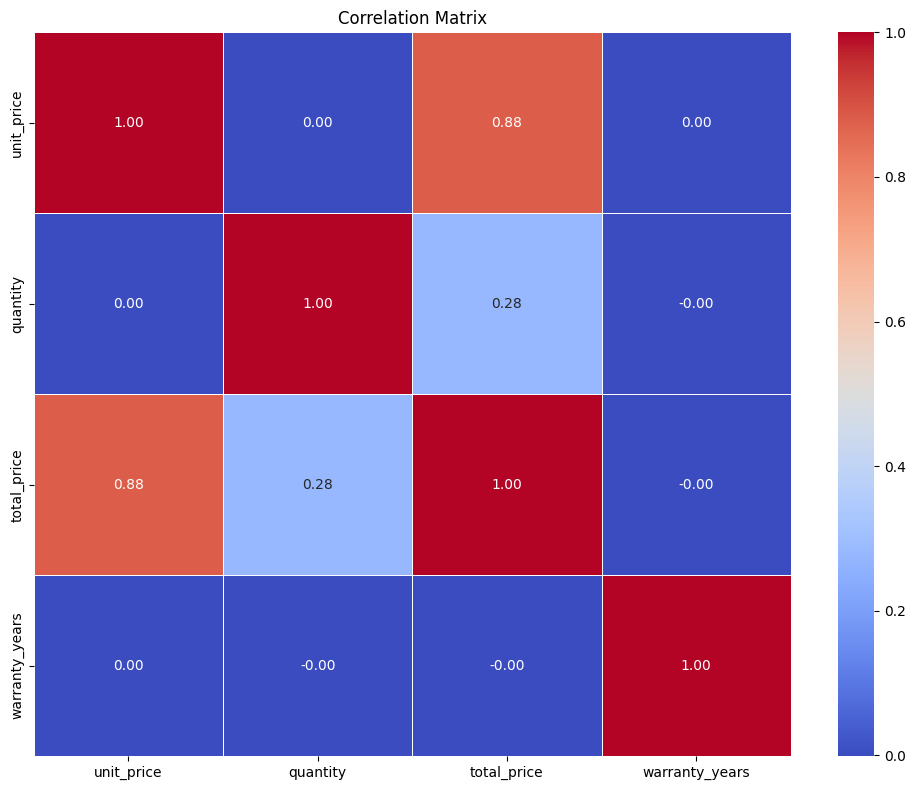

In [9]:
# %% [markdown]
# ## Correlation Analysis

# %%
# Correlation between numerical variables
numeric_cols = ['unit_price', 'quantity', 'total_price', 'warranty_years']
correlation = df_transformed[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [10]:
# %% [markdown]
# ## Save Processed Data for Modeling

# %%
# Save the processed data
data_loader.save_processed_data(df_with_outliers, 'processed_tech_sales.csv')
print("Data saved successfully for modeling!")

2025-05-20 21:02:07,191 - data_loader - INFO - Saving processed data to c:\Users\vgmar\smart-document-assistant\data\processed\processed_tech_sales.csv
2025-05-20 21:02:08,542 - data_loader - INFO - Successfully saved 100000 records to c:\Users\vgmar\smart-document-assistant\data\processed\processed_tech_sales.csv
Data saved successfully for modeling!
